# Extracting the cutoff scales from different simulation runs

## Load in spectra

In [25]:
import numpy as np

spectra = []
0.0025
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.1.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.01.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.015.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.0075.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.005.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.0025.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.0015.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g-0.001.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g1e-05.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.0001.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.0005.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.001.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.0025.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.005.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.0075.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.01.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.015.csv") )
spectra.append( np.loadtxt("Simulation Runs\\PSavg_N512_g0.02.csv") )

g_vals = [-0.1,-0.015, -0.01, -0.0075, -0.005, -0.0025,-0.0015,-0.001, 0., 1e-5, 1e-4, 0.0005, 1e-3, 0.0025, 5e-3, 0.0075,  1e-2, 1.5e-2, 2e-2]

k_modes = np.loadtxt("Simulation Runs\\PSkmodes_N512_g0.csv")

## Plot

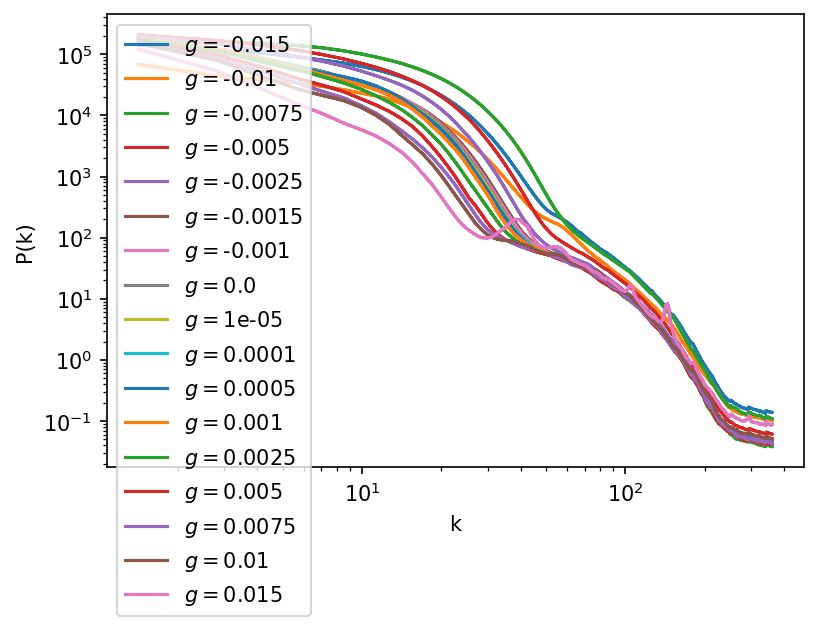

In [26]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.xlabel("k")
plt.ylabel("P(k)")
# plt.loglog(k_modes, PS_SI_3minus2, label =r"$g=3\times10^{-2}$")
for i in range(1,np.shape(spectra)[0]-1):
    plt.loglog(k_modes, spectra[i], label = r"$g=$"+str(g_vals[i]))
plt.legend()
# plt.axvline(x=40)
# plt.axvline(x=150)
# plt.ylim(5e-3,1e6 )
plt.show()

## Fit against Gaussian $A\exp(-k^2/k_0^2)$ to extract $k_0$

[2.6354612607893926e-05, 0.039108243636793, 0.042085342537037176, 0.037272295146078875, 0.03635795922240971, 0.035231026565296565, 0.03632303969648465, 0.03486794928287203, 0.03529955190477177, 0.034743085575887164, 0.03466990497728797, 0.03634399188304451, 0.03537242223089405, 0.035233468214406566, 0.03491455585968133, 0.034505013629377336, 0.03326467721194466, 0.030435693714588086, 0.04295993722572835]


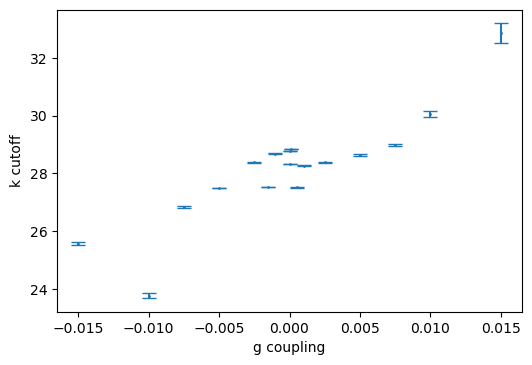

In [27]:
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick

def Gaussian(k, A, k0):
#     return A*np.exp(-k**2/k0**2)
    return A*np.exp(-k/k0)

start = 45 # starting index for the fit, ignoring low k's
end = 160 # ending index, ignoring high k's

Amps = []
cutoffs = []
lengths = []
errors = []

for i in range(np.shape(spectra)[0]):
    popt, pcov = curve_fit(Gaussian, k_modes[start:end], spectra[i][start:end], [100, 60])
    Amps.append(popt[0])
    cutoffs.append(popt[1])
    lengths.append(1/popt[1])
    errors.append(pcov[1][1])
    
print(lengths)
# print(errors)

plt.figure(dpi=100)
plt.errorbar(g_vals[1:18], cutoffs[1:18], yerr=errors[1:18], fmt = "o", capsize=5, markersize=1)
# plt.scatter(g_vals[1:10], lengths[1:10])
# plt.plot(g_vals[1:], 1/np.asarray(cutoffs[1:]))
plt.ylabel("k cutoff")
plt.xlabel("g coupling")
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.show()

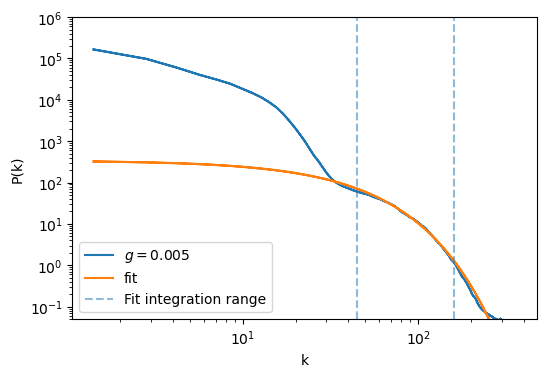

In [28]:
s = 14 # which spectrum to plot

plt.figure(dpi=100)
plt.xlabel("k")
plt.ylabel("P(k)")
# plt.loglog(k_modes, PS_SI_3minus2, label =r"$g=3\times10^{-2}$")
plt.loglog(k_modes, spectra[s], label=r"$g=$"+str(g_vals[s]))
plt.loglog(k_modes, Gaussian(k_modes, Amps[s], cutoffs[s]), label="fit")
# plt.axvline(x=40)
# plt.axvline(x=150)
plt.ylim(5e-2,1e6 )
plt.axvline(x = start, alpha=0.5, linestyle = "--", label = "Fit integration range")
plt.axvline(x = end, alpha=0.5, linestyle = "--" )
plt.legend()
plt.show()

## Temporal fluctuations

In [29]:
from numpy import average, absolute, shape, arange, sqrt, pi, load
from numpy.fft import fft

delta = load("Simulation Runs\\delta_sim_N512_g0.npy")

# FFT
F = fft(delta)

# |F(k)|^2
F_abs = absolute(F)**2

# N^2
N = len(delta)

# P(k)
P = F_abs


# Plot P(k) versus k modes
# k modes = sqrt(k_x^2 + k_y^2)
# k_x = 0, 1, 2, ..., N/2, -N/2, ..., -2, -1
# k_y = 0, 1, 2, ..., N/2, -N/2, ..., -2, -1

# k_x
k_t = arange(0,N)
k_t[int(N/2):] = k_t[int(N/2):] - N

Power_Spectrum = P

k_modes = k_t
# Power_Spectrum = Power_Spectrum[1:]

No handles with labels found to put in legend.


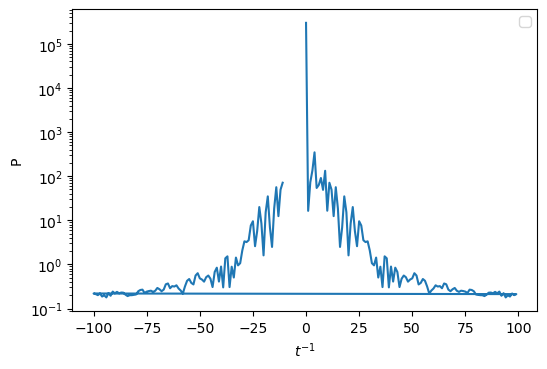

In [30]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.xlabel(r"$t^{-1}$")
plt.ylabel("P")
# plt.loglog(k_modes, PS_SI_3minus2, label =r"$g=3\times10^{-2}$")
plt.semilogy(k_modes[:N-10], Power_Spectrum[:N-10])
# plt.axvline(x=40)
# plt.axvline(x=150)

plt.legend()
plt.show()